<a href="https://colab.research.google.com/github/Kashishkewat/machine-learning/blob/main/ridge_regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
data = load_diabetes()
X=data.data
y=data.target

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)

In [34]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [35]:
y_pred=lr.predict(X_test)

In [36]:
from sklearn.metrics import r2_score,mean_squared_error
print("r2_score",r2_score(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

r2_score 0.5188113124539249
RMSE 48.72713760953253


In [37]:
from sklearn.linear_model import Ridge
r=Ridge(alpha=0.0001)
r.fit(X_train,y_train)

Ridge(alpha=0.0001)

In [38]:
y_pred1=r.predict(X_test)

In [30]:
print("r2_score",r2_score(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

r2_score 0.5188113124539249
RMSE 48.72713760953253


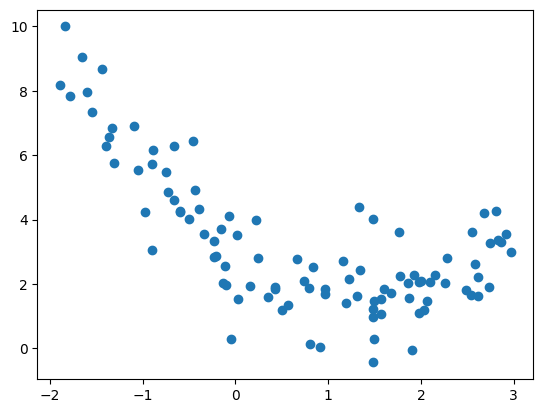

In [41]:
m=100
x1=5*np.random.rand(m,1)-2
x2=0.7*x1**2-2*x1+3+np.random.randn(m,1)
plt.scatter(x1,x2)
plt.show()

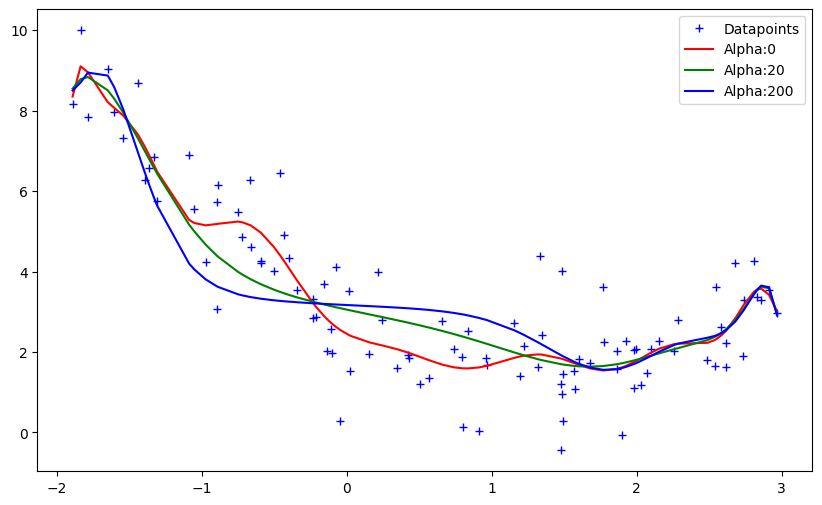

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(x1,x2,alpha):
  model=Pipeline([
      ('poly',PolynomialFeatures(degree=16)),
      ('ridge',Ridge(alpha=alpha))
  ])
  model.fit(x1,x2)
  return model.predict(x1)
alphas=[0,20,200]
cs=['r','g','b']
plt.figure(figsize=(10,6))
plt.plot(x1,x2,'b+',label='Datapoints')
for alpha,c in zip(alphas,cs):
  preds=get_preds_ridge(x1,x2,alpha)
  plt.plot(sorted(x1[:,0]),preds[np.argsort(x1[:,0])],c,label='Alpha:{}'.format(alpha))
plt.legend()
plt.show()